Библиотеки, которые используются в решении:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import time
%matplotlib inline

<img src=https://i.imgur.com/PXUhLoO.png, width=400>

In [2]:
xmin, xmax = 0, 1
ymin, ymax = 0, 1
T = 1

Nx, Ny, M = 100, 100, 100

x = np.linspace(xmin,xmax,Nx)
y = np.linspace(ymin,ymax,Ny)
t = np.linspace(0,T,M)
u = np.zeros((Nx, Ny, 2*M+1), dtype=float)

hx = float(xmax-xmin)/(Nx-1)
hy = float(ymax-ymin)/(Ny-1)
tau = float(T)/(M-1)
gx = tau/hx**2
gy = tau/hy**2

In [3]:
def f(i2, j):
  return np.cos(np.pi*y[i2])*np.exp(tau*j/2) # Возможно ошибка где 0.5

def F1(i1, i2, j):
  return 0.5*gy*(u[i1,i2-1,j-1]+u[i1,i2+1,j-1]) + (1-gy)*u[i1,i2,j-1] + 0.5*tau*f(i2,j+1)

def F2(i1, i2, j):
  return 0.5*gx*(u[i1-1,i2,j-1]+u[i1+1,i2,j-1]) + (1-gx)*u[i1,i2,j-1] + 0.5*tau*f(i2,j-1)

def progonka_po_x(i2, j):
  d = np.zeros(Nx)
  s = np.zeros(Nx)
  d[1] = 0
  s[1] = 0
  A = 0.5*gx
  B = 1 + gx
  C = 0.5*gx
  for m in range(1,Nx-1):
    Fm = -F1(m,i2,j)
    d[m+1] = C/(B-A*d[m])
    s[m+1] = (Fm-A*s[m])/(A*d[m]-B)
  u[Nx-1,i2,j] = 0
  for m in range(Nx-1,0,-1):
    u[m-1,i2,j] = d[m]*u[m,i2,j] + s[m]

def progonka_po_y(i1, j):
  d = np.zeros(Ny)
  s = np.zeros(Ny)
  d[1] = 1
  s[1] = 0
  A = 0.5*gy
  B = 1 + gy
  C = 0.5*gy
  for m in range(1,Ny-1):
    Fm = -F2(i1,m,j)
    d[m+1] = C/(B-A*d[m])
    s[m+1] = (Fm-A*s[m])/(A*d[m]-B)
  u[i1,Ny-1,j] = s[-1]/(1-d[-1])
  for m in range(Ny-1,0,-1):
    u[i1,m-1,j] = d[m]*u[i1,m,j] + s[m]

In [4]:
for j in range(1,2*M,2):
  for i2 in range(1,Ny-1):
    progonka_po_x(i2,j)
  for i1 in range(1,Nx-1):
    progonka_po_y(i1,j+1)

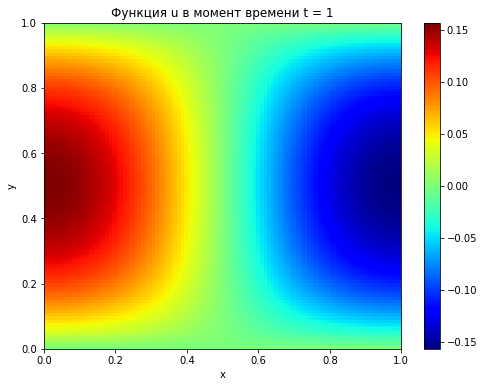

In [5]:
fig = plt.figure(figsize=(8,6))
plt.pcolormesh(x,y,u[:,:,-1], cmap='jet')

plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Функция u в момент времени t = {T}");

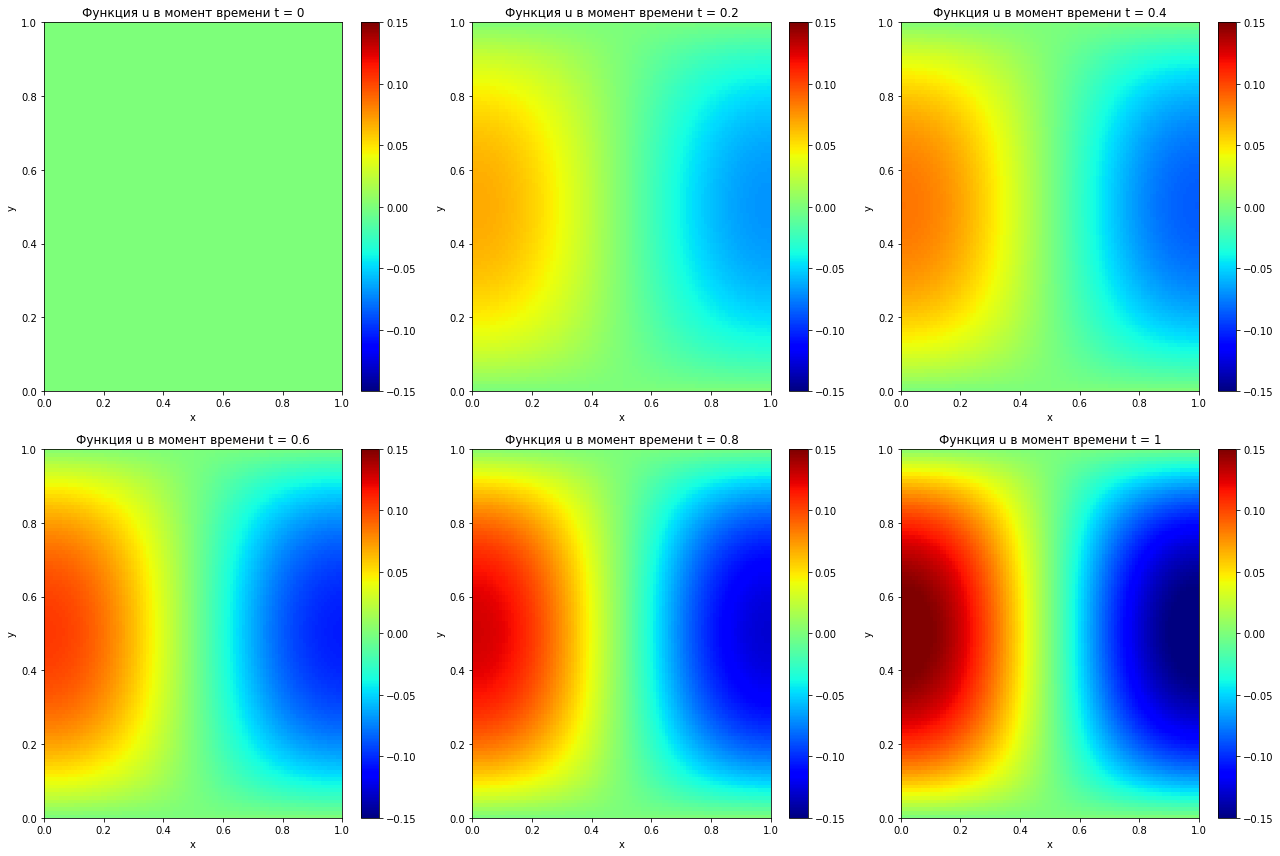

In [7]:
times = [0, 0.2, 0.4, 0.6, 0.8, 1]
fig = plt.figure(figsize=(18,12))
for i in range(len(times)):
  plt.subplot(2,3,i+1)
  time = int(times[i]/T*(2*M))
  plt.pcolormesh(x,y,u[:,:,time], cmap='jet', vmin=-0.15, vmax=0.15)
  plt.colorbar()
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(f"Функция u в момент времени t = {times[i]}")
plt.tight_layout()